**Lab 5: Ashley Anderson**
<br>**GitHub Link: https://github.com/ashleymaree/Lab_5.git**

In [33]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import random
import pandas as pd
import scipy.cluster.hierarchy as shc

In [34]:
##1a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.
A, y_true = make_blobs(n_samples = 60,
                       n_features = 50,
                       cluster_std = 13,
                       random_state = 100,
                       centers = 3)
A

array([[ 13.26245458,  21.97039987,   3.92626414, ...,  -4.55451107,
         -1.4401446 ,   1.04654378],
       [  3.29433473,  19.17181801,   0.07677371, ...,   3.80586121,
         -1.8801991 ,   1.32103054],
       [  8.97758869,  19.20323446,  17.80900372, ...,   0.68571265,
          7.78885753,  -3.73294742],
       ...,
       [ -2.27899825,  10.48600835, -21.41724296, ...,  -0.92512986,
         -1.11895063,   3.69973525],
       [ -6.53635858,  -6.36042074,  -3.46599297, ..., -19.01893179,
          5.00895956,   9.95440945],
       [  2.63895035,   6.96586236,  -5.24431106, ...,  20.92486419,
         -3.80813917,  -1.95089798]])

In [35]:
##1b) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?
kmeans = KMeans(n_clusters = 3)
kmeans.fit(A)
y_kmeans = kmeans.predict(A)
y_kmeans
pd.crosstab(y_true, y_kmeans)

col_0,0,1,2
row_0,,,
0,1,0,19
1,20,0,0
2,0,20,0


**1b:** The k-means clustering does pretty well; almost all observations are in their respective classes except 1 (row 0, column 2). 

In [36]:
##1c) Perform K-means clustering with K = 2. Describe your results.
kmeans = KMeans(n_clusters = 2)
kmeans.fit(A)
y_kmeans = kmeans.predict(A)
y_kmeans
pd.crosstab(y_true, y_kmeans)

col_0,0,1
row_0,,
0,20,0
1,18,2
2,0,20


**1c:** Now with k = 2, 2 of the classes are combined into one cluster and separate from the 3rd class. The 20 observations remain in the 3rd class and the combined class contains 40 observations. 

In [37]:
##1d) Now perform K-means clustering with K = 4 and describe your results.
kmeans = KMeans(n_clusters = 4)
kmeans.fit(A)
y_kmeans = kmeans.predict(A)
y_kmeans
pd.crosstab(y_true, y_kmeans)

col_0,0,1,2,3
row_0,,,,
0,12,0,7,1
1,0,0,0,20
2,0,19,1,0


**1d:** With k = 4, the clusters do not compare well to the true class labels. One class does remain intact with 20 observations, while the other two clusters are divided into 2 and 3 clusters. k = 4 is too high of a number of clusters for this dataset.

In [38]:
##1e) Perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (c)? Explain.
E, y_true = make_blobs(n_samples = 60,
                       n_features = 50,
                       cluster_std = 1,
                       random_state = 100,
                       centers = 3)
kmeans = KMeans(n_clusters = 3)
kmeans.fit(E)
y_kmeans = kmeans.predict(E)
y_kmeans
pd.crosstab(y_true, y_kmeans)

col_0,0,1,2
row_0,,,
0,20,0,0
1,0,0,20
2,0,20,0


**1e:** Now with the scaled standard deviation, k = 3 appropriately divides the observations into their 3 respective clusters; having 20 observations in each cluster as opposed to 1c where one observation was included in a different cluster than its true class label. Scaling the deviation down is a more appropriate way of visualizing this data with clustering.

In [39]:
##2a) Load the data
gene_data = pd.read_csv('Ch10Ex11.csv', header = None)
gene_data_T = gene_data.transpose()

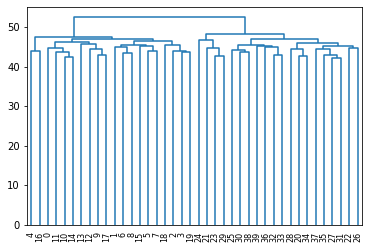

In [40]:
##2b) Apply hierarchical clustering to the samples. Use all combinations of correlation and Euclidian distance with single, average and complete linkage. Plot the dendrograms. 
dend_1 = shc.dendrogram(shc.linkage(gene_data_T, method='complete', metric='Euclidean'), leaf_rotation = 90)

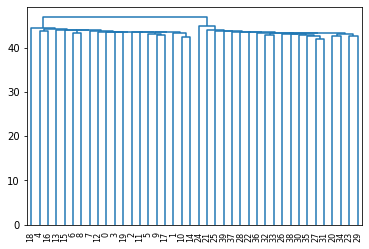

In [41]:
dend_2 = shc.dendrogram(shc.linkage(gene_data_T, method='single', metric='Euclidean'), leaf_rotation = 90)

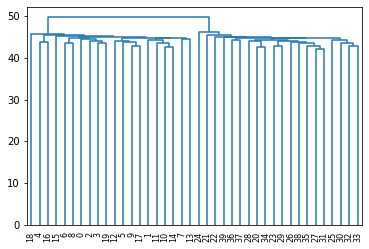

In [42]:
dend_3 = shc.dendrogram(shc.linkage(gene_data_T, method='average', metric='Euclidean'), leaf_rotation = 90)

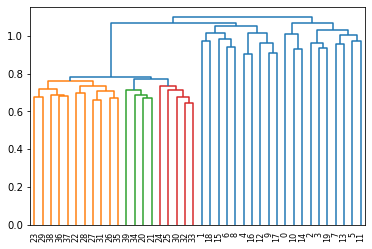

In [43]:
dend_4 = shc.dendrogram(shc.linkage(gene_data_T, method='complete', metric='correlation'), leaf_rotation = 90)

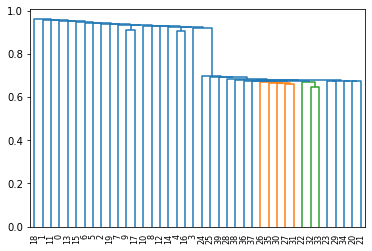

In [44]:
dend_5 = shc.dendrogram(shc.linkage(gene_data_T, method='single', metric='correlation'), leaf_rotation = 90)

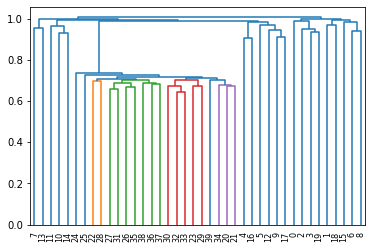

In [45]:
dend_6 = shc.dendrogram(shc.linkage(gene_data_T, method='average', metric='correlation'), leaf_rotation = 90)

**2b) Do the genes separate the samples into the two groups? Do the results change with distance and linkage? How?**
For the most part, the genes are separated into two groups with the first 5 dendrograms pictured above. You can see this by looking at the numbers 1-20 are grouped together and 21-40 are grouped together. The results change with distance; the Euclidean is preferrable as for each Euclidean dendrogram there are always two distinct separations at first. The results change for linkage as well. The single linkage is the least preferrable (especially for correlation distance) as it begins by putting one sample off by itself at first. 